<a href="https://colab.research.google.com/github/aleena999/wbc_deepLearning/blob/main/mrKhan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MrKhan0747/Blood-Cell-Subtypes-Classification.git

Cloning into 'Blood-Cell-Subtypes-Classification'...
remote: Enumerating objects: 113, done.
remote: Total 113 (delta 0), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (113/113), 1.49 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [7]:
!unzip /content/dataset2-master.zip


Archive:  /content/dataset2-master.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dataset2-master.zip or
        /content/dataset2-master.zip.zip, and cannot find /content/dataset2-master.zip.ZIP, period.


In [ ]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [ ]:
#TRAIN AND TEST DATASET ADDRESS
DATASET="./dataset2-master/images/TRAIN"
TEST_DATASET="./dataset2-master/images/TEST"

#Categroized images
#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]



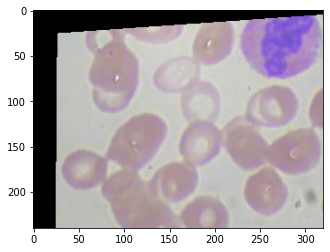

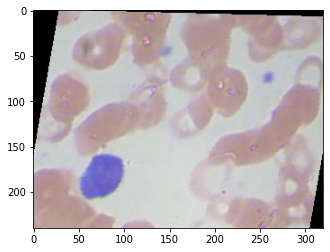

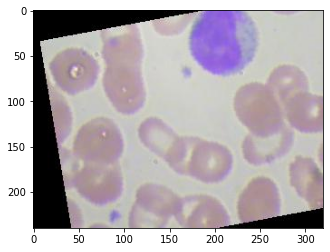

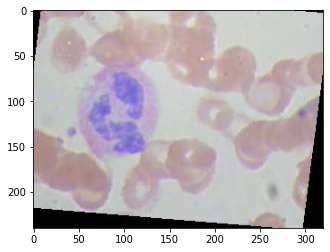

In [ ]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder


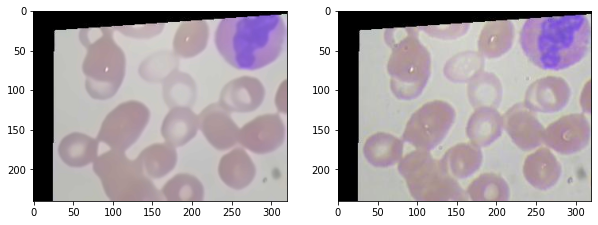

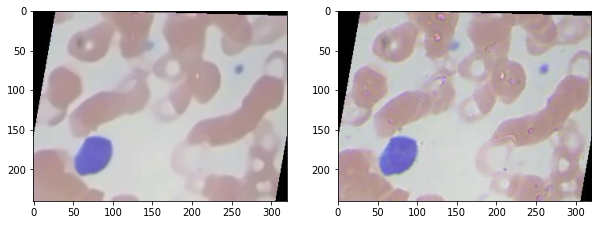

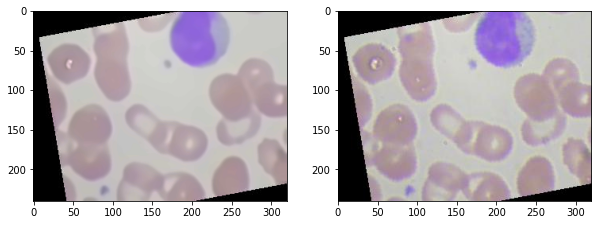

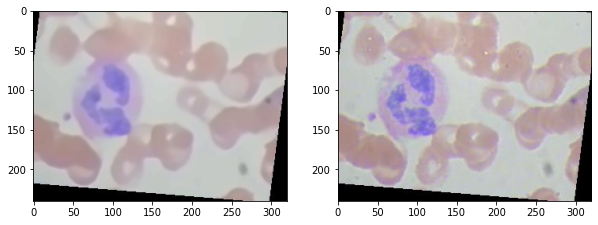

In [ ]:

#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            #print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder



In [ ]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])



In [ ]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])



In [ ]:
#print total data in train and test
print(len(train_data))
print(len(test_data))



9957
2487


In [ ]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)



In [ ]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])



1
3
0
3
0
0
0
0
0
1


In [ ]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)



(9957, 9957)

In [ ]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)



(2487, 2487)

In [ ]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0



(9957, 60, 60, 3)

In [ ]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0



(2487, 60, 60, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


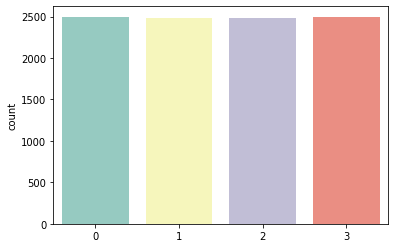

In [ ]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data 

In [ ]:
from tensorflow.keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test



array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
#build the models
#import Keras libraries


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
          
model.add(Dense(4,activation='softmax'))

model.summary()

NameError: ignored

In [ ]:


#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


NameError: ignored

In [ ]:

#lets split the 20% train dataset for validation 
hist=model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)


NameError: ignored

In [ ]:

#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc


78/78 [==============================] - 1s 8ms/step - loss: 0.8013 - accuracy: 0.7949


(0.8012977838516235, 0.7949336767196655)

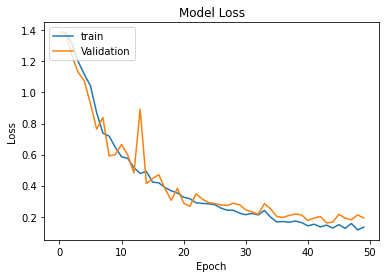

In [ ]:

#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()


In [ ]:

#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()


NameError: ignored

In [ ]:

#model prediction

y_pred=model.predict_classes(test_X)
y_pred


In [ ]:

for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))


In [ ]:

#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)


In [ ]:


sns.heatmap(confusion_matrix(test_y,y_pred))

NameError: ignored